In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import StandardScaler
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import seaborn as sns


drive.mount('/content/drive', force_remount=True)

data = pd.read_csv('./drive/MyDrive/Albuquerque_Final_2022-06-18.csv')


Mounted at /content/drive


In [ ]:
tree_types  = pd.get_dummies(data['common_name'])
condition = pd.get_dummies(data['condition'])

x_data = data[['longitude_coordinate', 	'latitude_coordinate']]
x_data = pd.concat([x_data, tree_types], axis=1)
y_data = condition
all_data = pd.concat([x_data, y_data], axis=1)
all_data = all_data.dropna()
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=25)

x_train = train_data.iloc[:, 0:-5]
y_train = train_data.iloc[:,-5:]
x_test = test_data.iloc[:, 0:-5]
y_test = test_data.iloc[:,-5:]


In [ ]:
print(y_test)

      dead/dying  excellent  fair  good  poor
455            0          0     1     0     0
974            0          1     0     0     0
1253           0          0     0     1     0
1260           0          1     0     0     0
970            0          0     0     1     0
...          ...        ...   ...   ...   ...
708            0          0     0     1     0
1619           0          0     0     1     0
1518           0          0     0     1     0
1724           0          0     1     0     0
1307           0          0     0     1     0

[501 rows x 5 columns]


                        longitude_coordinate  latitude_coordinate  \
longitude_coordinate                1.000000             0.394467   
latitude_coordinate                 0.394467             1.000000   
Afghan pine                        -0.130958            -0.124596   
American basswood                        NaN                  NaN   
American elm                        0.018717            -0.012521   
...                                      ...                  ...   
Texas red oak                       0.000391            -0.039753   
Tree of heaven                      0.021587             0.005262   
Velvet ash arizona ash              0.016420            -0.010858   
Vitex                              -0.053292            -0.079219   
White ash                          -0.030012            -0.001308   

                        Afghan pine  American basswood  American elm  \
longitude_coordinate      -0.130958                NaN      0.018717   
latitude_coordinate       -

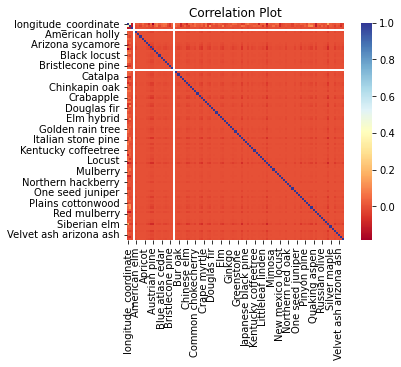

In [ ]:
# Compute and print
corr_df= x_train
cor= corr_df.corr(method='pearson') 
print(cor)

# Plot
fig_corr, ax_corr =plt.subplots()
plt.title("Correlation Plot")
sns.heatmap(cor, cmap=plt.cm.RdYlBu, square=True, ax=ax_corr)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train= x_train.to_numpy()
x_test = x_test.to_numpy()
# y_train = y_train.astype('int64')


theta = LogisticRegression(penalty='l2', C=1)
theta.fit(x_train, y_train)
coeff = theta.coef_
print(coeff)
threshold = 0.5
y_pred_lg = (theta.predict(x_test)) #> threshold).astype(int)
#y_test = y_test*1
# y_test = y_test.astype('int64')


acc_lg = accuracy_score(y_test, y_pred_lg)
print("Accuracy LG : ", acc_lg)

fig2, ax2 = plt.subplots()

# Add decision boundary color map

# DecisionBoundaryDisplay.from_estimator(
#     theta,
#     x_test,
#     cmap=plt.cm.RdYlBu,
#     response_method="predict",
#     grid_resolution=200,
#     ax=ax2,
#     alpha=0.4,
#     xlabel=features[0],
#     ylabel=features[1],
# )
# # Add scatter plot and title
# ax2.scatter(X_test_lg[:, 0], X_test_lg[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
# ax2.set_title("Decision boundary Logistic Regression")


ValueError: ignored